In [2]:
# %pip install urllib
import urllib.request
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyprojroot import here

## load file GeoNames

In [2]:
# download allCountries.zip from GeoNames
if not os.path.exists(os.getcwd() + "/allCountries.zip"): # download dataset if haven't already
  urllib.request.urlretrieve("https://download.geonames.org/export/dump/allCountries.zip", "allCountries.zip")

In [3]:
# extract allCountries.zip
import zipfile

if not os.path.exists(os.getcwd() + "/allCountries.txt"): # extract dataset if haven't already
  # extract zip file to the temp cloud drive
  with zipfile.ZipFile(os.getcwd() + "/allCountries.zip", 'r') as zip_ref:
      zip_ref.extractall(os.getcwd())

In [3]:
# formulate a string list with geoname column names
g_headers = [np.char.strip(col_name).tolist() for col_name in pd.read_csv('geoname_headers.csv',header = None).to_numpy().flatten()]

In [4]:
# load allCountries.txt
geonames = pd.read_csv('allCountries.txt', header = len(g_headers), names = g_headers, sep = '\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8,9,10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
# delete unuseful columns
geonames = geonames[['geonameid','name','latitude','longitude','feature class','feature code']]
geonames

,geonameid,name,latitude,longitude,feature class,feature code
0,3038827,Visanseny,42.57488,1.61616,L,LCTY
1,3038828,Roc de la Vinya,42.52776,1.56446,T,RK
2,3038829,Canal de la Vinya,42.52232,1.52319,H,STM
3,3038830,Bosc de Villar,42.60135,1.54340,V,FRST
4,3038831,Torrent de Vila,42.53414,1.56678,H,STM
...,...,...,...,...,...,...
12325007,12429121,Yangjiong Hill,7.82714,-146.01458,U,HLLU
12325008,12429122,Yipu Hill,0.51194,-101.05669,U,HLLU
12325009,12429123,Yuqing Seamount,10.21681,57.72575,U,SMU
12325010,12429124,Zélia Gattai Seamount,-14.89653,-32.08058,U,SMU


In [6]:
#geonames features
geonames_feature = pd.read_csv('featureCodes_en.txt', header = 4, names = ['feature class','feature code abbr', 'feature code', 'description'], sep = '\t|\.')
geonames_feature


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,feature class,feature code abbr,feature code,description
0,A,ADM3H,historical third-order administrative division,a former third-order administrative division
1,A,ADM4,fourth-order administrative division,a subdivision of a third-order administrative ...
2,A,ADM4H,historical fourth-order administrative division,a former fourth-order administrative division
3,A,ADM5,fifth-order administrative division,a subdivision of a fourth-order administrative...
4,A,ADM5H,historical fifth-order administrative division,a former fifth-order administrative division
...,...,...,...,...
668,V,MDW,meadow,"a small, poorly drained area dominated by gras..."
669,V,OCH,orchard(s),a planting of fruit or nut trees
670,V,SCRB,scrubland,"an area of low trees, bushes, and shrubs stunt..."
671,V,TREE,tree(s),a conspicuous tree used as a landmark


## load MarineRegions

In [7]:
# load MarineRegions.csv
marine_regions = pd.read_excel('MarineRegions_gazetteer_export_2022-05-02.xlsx')
# delete repetition
marine_regions = marine_regions[marine_regions['dcterms:language'] == 'en']
# delete unnecessary columns
marine_regions = marine_regions.iloc[:,0:8]
marine_regions

here()
!ls ../GEO877
marine_regions.to_csv (here("./MarineRegions.csv"), index = True, header=True)

,locationID,locality,dcterms:language,isPreferredName,Placetype,geodeticDatum,decimalLatitude,decimalLongitude
2,http://marineregions.org/mrgid/14,Belgium,en,-1,Nation,EPSG:4326,50.500750,4.477050
7,http://marineregions.org/mrgid/15,Netherlands,en,-1,Nation,EPSG:4326,52.156150,5.292950
9,http://marineregions.org/mrgid/16,England,en,-1,Country,EPSG:4326,52.487400,-2.344000
12,http://marineregions.org/mrgid/17,France,en,-1,Nation,EPSG:4326,46.210750,2.188950
16,http://marineregions.org/mrgid/20,West Flanders,en,0,Province (administrative),EPSG:4326,51.037500,3.034200
...,...,...,...,...,...,...,...,...
83665,http://marineregions.org/mrgid/63533,BENTHOBS Saline Trou Eau,en,-1,Sampling Station,EPSG:4326,-21.100020,55.241267
83666,http://marineregions.org/mrgid/63534,BENTHOBS Saint-Benoit Bourbier,en,-1,Sampling Station,EPSG:4326,-21.011930,55.717350
83667,http://marineregions.org/mrgid/63535,BENTHOBS Saint-Leu,en,-1,Sampling Station,EPSG:4326,-21.116020,55.269480
83668,http://marineregions.org/mrgid/63536,Banc Durand,en,-1,Bank,EPSG:4326,-22.045000,168.680000


## matching features in Geonames and MarineRegions

In [8]:
gn_featuresclass_counts = geonames.groupby('feature class').count().reset_index().sort_values(by=['name'],ascending=False)
gn_featurescode_counts = geonames.groupby('feature code').count().reset_index().sort_values(by=['name'],ascending=False)
mr_features_counts = marine_regions.groupby('Placetype').count().reset_index().sort_values(by=['locality'],ascending=False)
mr_top_features = marine_regions.groupby('Placetype').count().reset_index().sort_values(by=['locality'],ascending=False).iloc[0:20,:]

In [9]:
#check what is the features of top features from marineregion in geonames 
def check_feature(feature):
  a = marine_regions[marine_regions['Placetype']== feature]
  b = pd.merge(geonames, a, how="inner",left_on='name',right_on='locality',sort=True)
  return b

check_feature('Archipelago')

,geonameid,name,latitude,longitude,feature class,feature code,locationID,locality,dcterms:language,isPreferredName,Placetype,geodeticDatum,decimalLatitude,decimalLongitude
0,6630499,Aagaard Islands,-65.85000,53.66667,T,ISL,http://marineregions.org/mrgid/11004,Aagaard Islands,en,-1,Archipelago,EPSG:4326,-65.850000,53.666667
1,3572936,Acklins,22.48023,-73.89496,T,ISL,http://marineregions.org/mrgid/15044,Acklins,en,-1,Archipelago,EPSG:4326,22.430000,-73.970000
2,3572936,Acklins,22.48023,-73.89496,T,ISL,http://marineregions.org/mrgid/15044,Acklins,en,-1,Archipelago,EPSG:4326,22.430000,-73.970000
3,3572939,Acklins,22.65000,-73.86667,S,AIRF,http://marineregions.org/mrgid/15044,Acklins,en,-1,Archipelago,EPSG:4326,22.430000,-73.970000
4,3572939,Acklins,22.65000,-73.86667,S,AIRF,http://marineregions.org/mrgid/15044,Acklins,en,-1,Archipelago,EPSG:4326,22.430000,-73.970000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,8426441,Zanzibar Archipelago,-5.64332,39.54529,T,ISLS,http://marineregions.org/mrgid/14831,Zanzibar Archipelago,en,-1,Archipelago,EPSG:4326,NaN,NaN
893,6628507,Zashchitnyye Islands,-68.42778,78.25000,T,ISL,http://marineregions.org/mrgid/13277,Zashchitnyye Islands,en,-1,Archipelago,EPSG:4326,-68.427778,78.250000
894,6628522,Zed Islands,-62.43300,-60.16600,T,ISL,http://marineregions.org/mrgid/13957,Zed Islands,en,-1,Archipelago,EPSG:4326,-62.433333,-60.166667
895,4033032,Îles du Vent,-17.50000,-149.50000,T,ISLS,http://marineregions.org/mrgid/32803,Îles du Vent,en,-1,Archipelago,EPSG:4326,-17.500000,-149.500000


In [10]:
mr_gn_top_features = pd.read_csv('top_features.csv')
mr_gn_top_features 

,mr_placetype,mr_counts,gn_feature_class,gn_feature_code,gn_features,gn_counts
0,ICES Statistical Rectangles,11075,NaN,none,none,0
1,Mineral Rights Areas,6353,NaN,none,none,0
2,Island,3255,T,ISL,island,155621
3,Seamount(s),2514,U,"SMU, SMSU","seamounts, seamount",1661
4,Bay,1950,H,"BAY, BAYS","bay, bays",50726
5,Rock,1604,T,"RK, RKS","rock, rocks",34912
6,Shoal,1460,U,"SHLU, SHSU,COVE","shoal, shoals,cove(s)",24790
7,Bank,1444,U,"BNKU, BKSU","bank, banks",566
8,Ward,1278,U,"SPRU, CRSU","spur, continental rise",96
9,Canyon(s),1234,U,"CNSU, CNYU","canyon, canyons",715


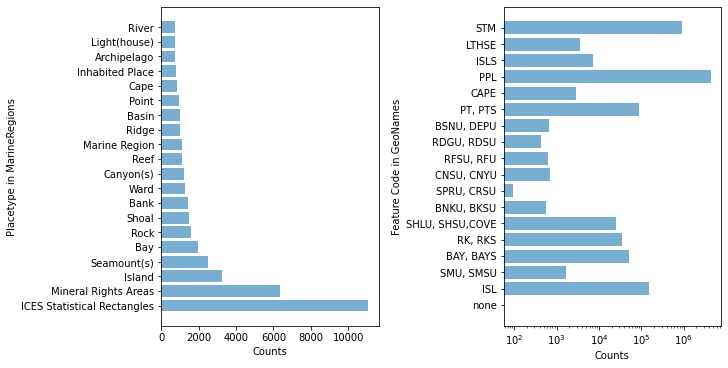

In [11]:
fig, ax = plt.subplots(1,2,figsize = (10, 5), constrained_layout = True) # subplot 2 rows,1 column

# plot marine regions top features
ax[0].barh(mr_top_features.Placetype.tolist(), mr_top_features.locality.tolist(), alpha = 0.6)
ax[0].set_ylabel('Placetype in MarineRegions')
ax[0].set_xlabel('Counts')
# plot these top features in geonames
ax[1].barh(mr_gn_top_features['gn_feature_code'].tolist(), mr_gn_top_features['gn_counts'].tolist(), alpha = 0.6)
ax[1].set_ylabel('Feature Code in GeoNames')
ax[1].set_xlabel('Counts')
ax[1].set_xscale("log") # log scale 


In [48]:
# make dictionary for points in each feature
marine_regions = marine_regions[pd.isna(marine_regions['decimalLatitude']) == False] # delete na

# marine regions
features = mr_gn_top_features.mr_placetype.tolist()
marine_regions_dic = {}

for f in features:
  mr_temp = marine_regions[marine_regions['Placetype']== f]
  lat = mr_temp.decimalLatitude	.tolist() # list of latitude
  lon = mr_temp.decimalLongitude.tolist() # list of longitude
  points = [] # all points in a list
  for i in range(len(mr_temp)):
    points.append([lat[i],lon[i]])
  marine_regions_dic[f]= points


In [16]:
# geonames

# merge features
top_features2 = pd.read_csv('top_features2.csv')
geonames_selected = pd.merge(geonames, top_features2, how="left",left_on='feature code',right_on='gn_feature_code')


In [22]:
# delete irrelavante records
geonames_selected = geonames_selected[pd.isna(geonames_selected['mr_placetype']) == False]

In [31]:
features = mr_gn_top_features.mr_placetype.tolist()
geonames_dic = {}

for f in features:
  gn_temp = geonames_selected[geonames_selected['mr_placetype']== f]
  lat = gn_temp.latitude	.tolist() # list of latitude
  lon = gn_temp.longitude.tolist() # list of longitude
  points = [] # all points in a list
  for i in range(len(gn_temp)):
    points.append([lat[i],lon[i]])
  geonames_dic[f]= points

In [38]:
len(geonames_dic['Shoal'])

24790

In [49]:
# save the dic as jason
import json

with open('marine_regions_dic.json', 'w') as f:
    json.dump(marine_regions_dic, f)

In [40]:
with open('geonames_dic.json', 'w') as f:
    json.dump(geonames_dic, f)

In [52]:
marine_regions_dic

{'Archipelago': [[58.55111111111111, 22.71638888888889],
  [38.32455, -28.1377],
  [38.32455, -28.1377],
  [38.32455, -28.1377],
  [49.44915, -2.349499],
  [49.44915, -2.349499],
  [61.88045, -7.00065],
  [61.88045, -7.00065],
  [61.88045, -7.00065],
  [61.88045, -7.00065],
  [55.0205, -4.450799],
  [55.0205, -4.450799],
  [49.87825012207031, -6.348200082778931],
  [49.87825012207031, -6.348200082778931],
  [49.87825012207031, -6.348200082778931],
  [60.19175, -1.42325],
  [60.19175, -1.42325],
  [59.0344, -3.39915],
  [59.0344, -3.39915],
  [59.0344, -3.39915],
  [57.9533, -7.2306],
  [57.9533, -7.2306],
  [57.9533, -7.2306],
  [57.9533, -7.2306],
  [39.3654, 2.771501],
  [39.3654, 2.771501],
  [39.16365, 2.947101],
  [41.3421, 9.2556],
  [41.3421, 9.2556],
  [43.02025, 6.435801],
  [43.02025, 6.435801],
  [42.83775, 10.4543],
  [42.83775, 10.4543],
  [42.83775, 10.4543],
  [42.83775, 10.4543],
  [40.92445, 12.95795],
  [40.92445, 12.95795],
  [38.5889, 14.7913],
  [38.5889, 14.7913],